***Image Classifier Project***

In [7]:
%pip install -r ../requirements.txt
!pip install scipy tensorflow
!pip install matplotlib


[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


***Step 2***

# importar librerias:
from tensorflow import keras
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from matplotlib import pyplot
from matplotlib.image import imread

In [8]:
# importar librerias:
from tensorflow import keras
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from matplotlib import pyplot
from matplotlib.image import imread

In [9]:
# esto es para cargar el zip pero yo lo arme como Sub_train y Sub_test
#import shutil

#filename = "../data/raw/test1.zip"
#filename1 = "../data/raw/train.zip"
#extract_dir = "../data/raw/test1"
#extract_dir1 = "../data/raw/train"
#archive_format = "zip"

# Unpack the archive file
#shutil.unpack_archive(filename, extract_dir, archive_format)
#shutil.unpack_archive(filename1, extract_dir1, archive_format)

***Step3***

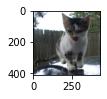

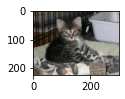

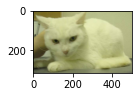

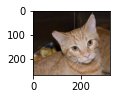

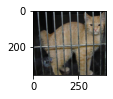

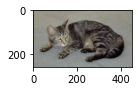

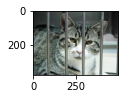

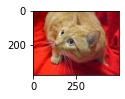

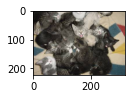

In [10]:
# plot cat photos from the dogs vs cats dataset
# define location of dataset
folder = "../data/raw/train/sub_train/cat/"
#extract_dir1 = "../data/raw/test"
#folder = 'train/'
# plot first few images
for i in range(11,20):
# define subplot
    pyplot.subplot(330 + 1 + i-11)
    # define filename
    filename = folder + 'cat.' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
    # show the figure
    pyplot.show()

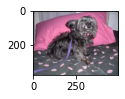

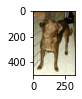

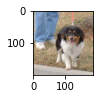

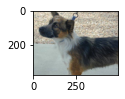

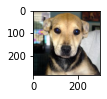

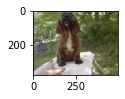

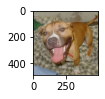

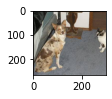

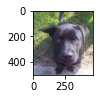

In [11]:
# plot dog photos from the dogs vs cats dataset
# define location of dataset
folder = "../data/raw/train/sub_train/dog/"
#extract_dir1 = "../data/raw/test"
#folder = 'train/'
# plot first few images
for i in range(0,9):
# define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = folder + 'dog.' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
    # show the figure
    pyplot.show()

***Step4***

In [12]:
# Use the ImageDataGenerator to load the data

trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="../data/raw/train/sub_train/",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="../data/raw/train/sub_test/", target_size=(224,224))

Found 24119 images belonging to 2 classes.
Found 881 images belonging to 2 classes.


***Step5***

In [13]:
# pasar la data por la red neuronal
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

2022-08-07 19:40:43.305048: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-07 19:40:43.305092: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-07 19:40:43.306287: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (luisoliari-imageclassif-mgbjt3o6yw1): /proc/driver/nvidia/version does not exist
2022-08-07 19:40:43.308996: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


***Step6***

In [14]:
# Pasar la data por la capa densa 
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

2022-08-07 19:40:46.037535: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 411041792 exceeds 10% of free system memory.
2022-08-07 19:40:46.153241: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 411041792 exceeds 10% of free system memory.
2022-08-07 19:40:46.230260: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 411041792 exceeds 10% of free system memory.


***Step7***

In [15]:
# compilar el modelo:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


***Step8***

In [16]:
# obtener el resumen del modelo:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

***Step9***

In [17]:
# Create objects for ModelCheckpoint and EarlyStopping, and pass them as callback functions to fit_generator
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=100,generator=traindata, validation_data= testdata, validation_steps=10,epochs=100,callbacks=[checkpoint,early])


Epoch 1/100


/tmp/ipykernel_2049/3670726196.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(steps_per_epoch=100,generator=traindata, validation_data= testdata, validation_steps=10,epochs=100,callbacks=[checkpoint,early])
2022-08-07 19:40:51.263017: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 411041792 exceeds 10% of free system memory.
2022-08-07 19:40:51.304098: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 411041792 exceeds 10% of free system memory.


  1/100 [..............................] - ETA: 24:18 - loss: 0.6707 - accuracy: 0.6562

KeyboardInterrupt: 